# Introduction to Computer Vision - provided by Georgia Tech University

Notebook used to solve the exercises from the Introduction to Computer Vision course provided by Georgia Tech University.
The course uses Matlab / Octane examples. In this notebook the exercises will be solved using python & opencv instead.

- Source: https://learn.udacity.com/courses/ud810
- Resources related to this course: https://github.com/mxagar/georgia_tech_computer_vision


## 2A-L1 Images as functions

In [24]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

def plot_image(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # https://stackoverflow.com/questions/61793889/matplotlib-displays-not-right-color
    plt.show()


### Load and Display an Image

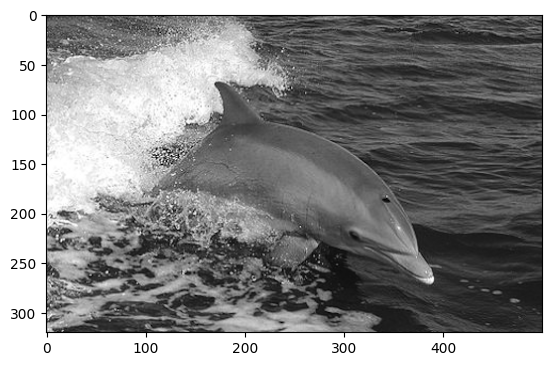

(320, 500)
uint8


In [6]:
# Load and display an image
# codes: https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80ae29981cfc153d3b0cef5c0daeedd2125
img = cv2.imread('images/dolphin.png', cv2.IMREAD_UNCHANGED)
plot_image(img)

# img size
print(img.shape)

# img class or data type
print(img.dtype)

### Inspect Image Values

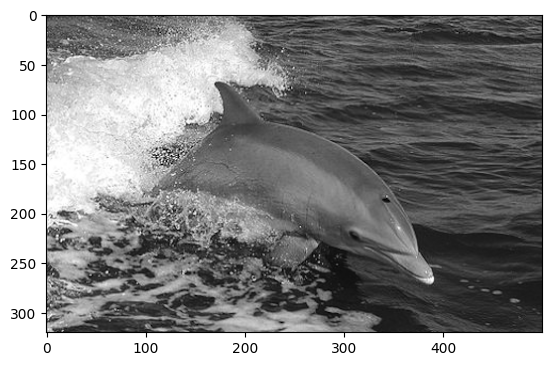

(320, 500)
[[81 77 77]
 [81 78 76]
 [82 79 77]]


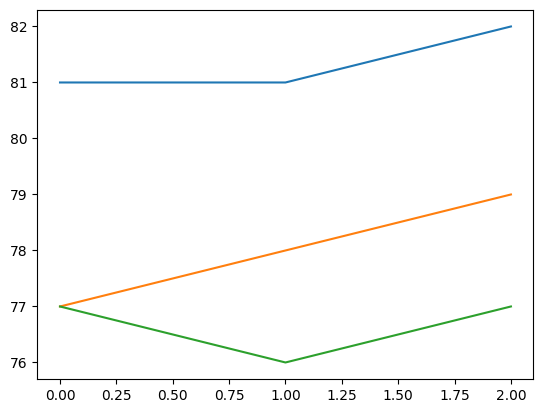

In [16]:
# Inspect image values
img = cv2.imread('images/dolphin.png', cv2.IMREAD_UNCHANGED)
plot_image(img)
print(img.shape)

# TODO: Extract a 2D slice between rows 100 to 102 and columns 200 to 202 (inclusive)
print(img[100:103, 200:203])
plt.plot(img[100:103, 200:203])
plt.show()

### Crop an Image

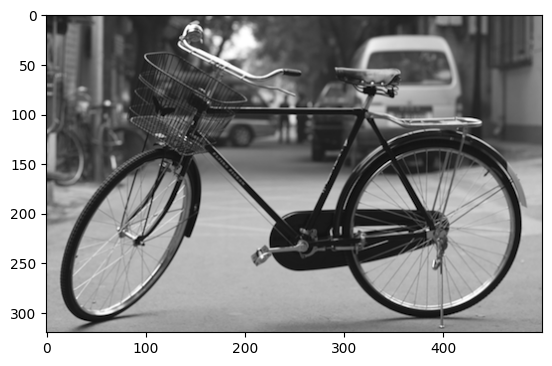

(320, 500)


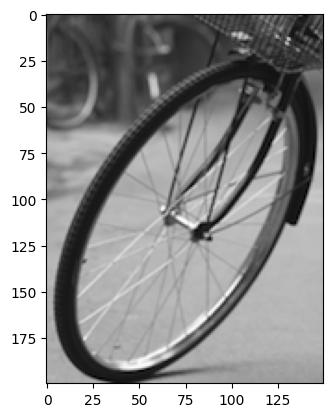

(200, 150)


In [17]:
# Crop an image
img = cv2.imread('images/bicycle.png', cv2.IMREAD_UNCHANGED)
plot_image(img)

print(img.shape)

cropped = img[110:310, 10:160]
plot_image(cropped)

# TODO: Find out cropped image size
print(cropped.shape)

### Color Planes

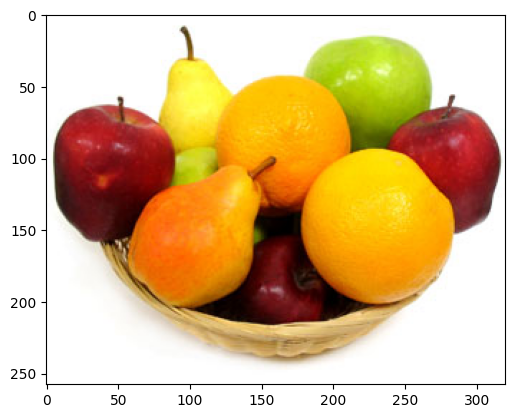

(258, 320, 3)


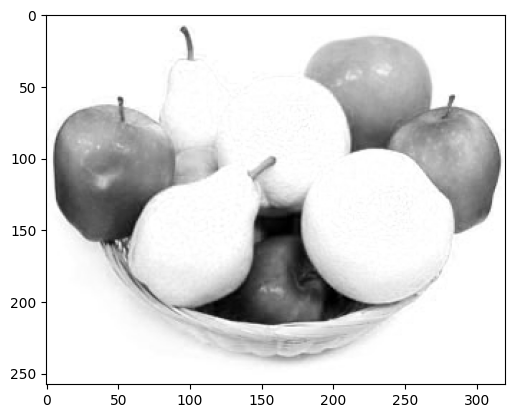

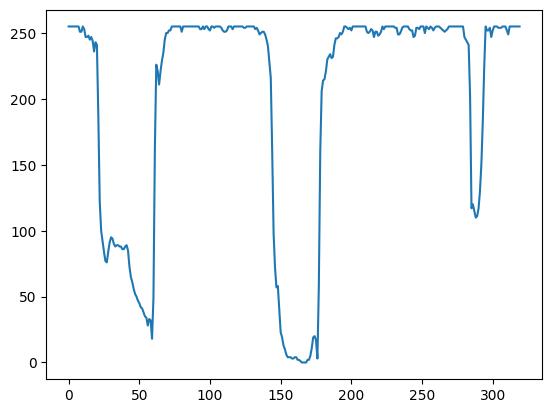

In [18]:
# Color planes
img = cv2.imread('images/fruit.png', cv2.IMREAD_UNCHANGED)
plot_image(img)

print(img.shape)

# TODO: Select a color plane, display it, inspect values from a row
red_channel_img = img[:, :, 2] # BGR format
plot_image(red_channel_img)
plt.plot(red_channel_img[150, :])

### Blend 2 Images

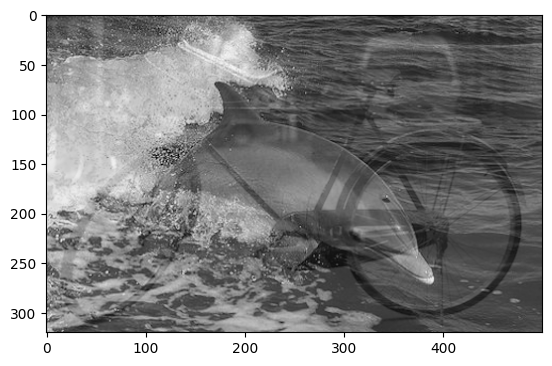

In [19]:
# Blend two images
def blend(a, b, alpha):
    # TODO: Your code here; finally assign: output = <something>;
    output = (a * alpha).astype('uint8') + (b * (1 - alpha)).astype('uint8')  
    return output


# Test code:
dolphin = cv2.imread('images/dolphin.png', cv2.IMREAD_UNCHANGED)
bicycle = cv2.imread('images/bicycle.png', cv2.IMREAD_UNCHANGED)

result = blend(dolphin, bicycle, 0.75)
plot_image(result) # note: will result in an error if blend() returns empty or incorrect value


### Generate Gaussian Noise

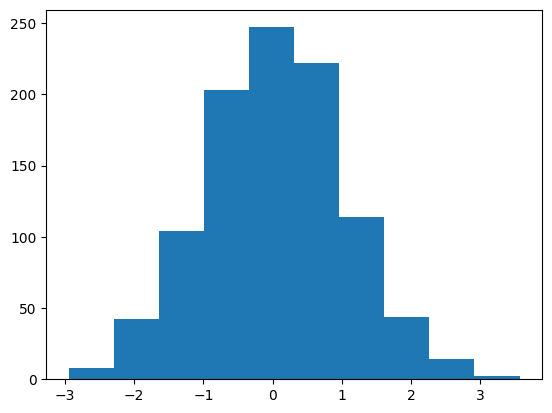

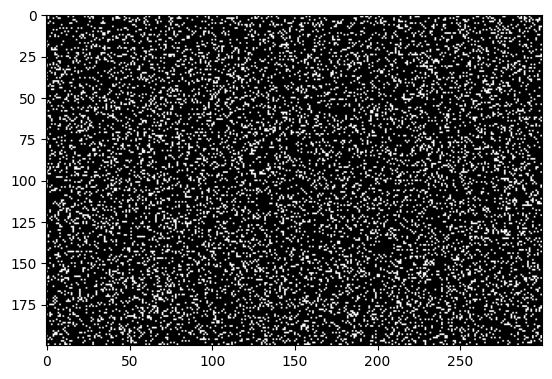

In [20]:
# Generate Gaussian noise
noise = np.random.normal(0, 1, 1000)
plt.hist(noise)
plt.show()

# % TODO: Try generating other kinds of random numbers.
# %       How about a 2D grid of random Gaussian values?

noise = np.random.normal(0, 1, (200, 300))
plot_image(noise.astype('uint8'))

## 2A-L2 Filtering

### Remove Noise

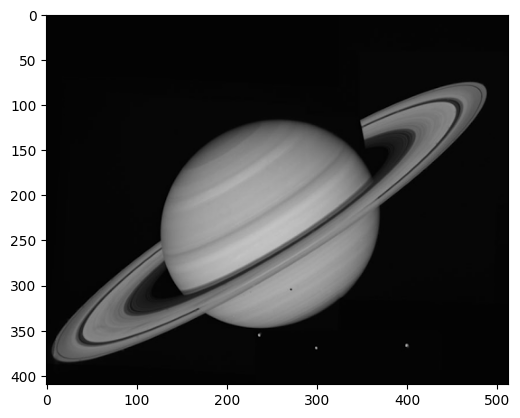

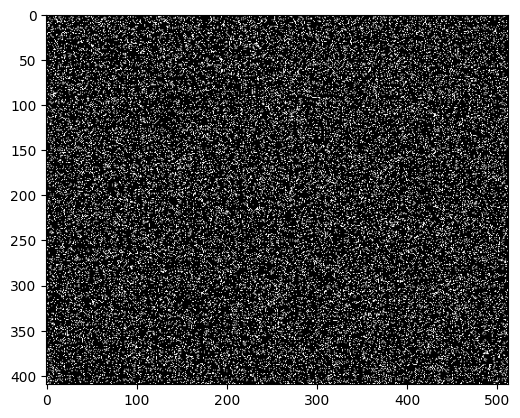

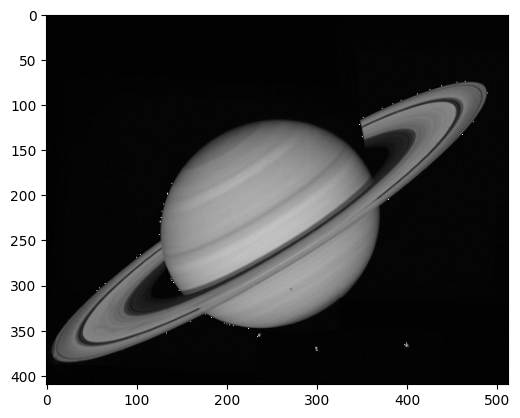

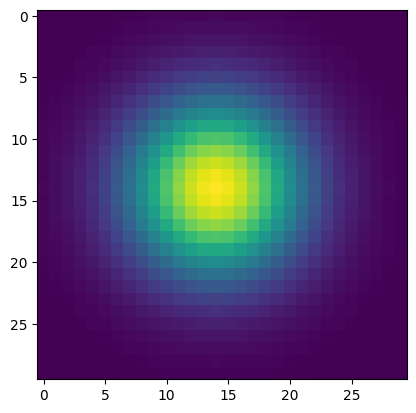

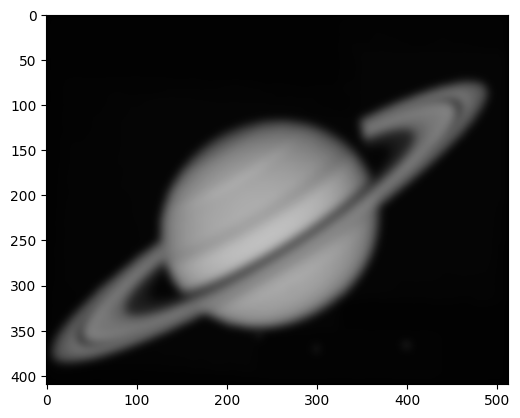

In [27]:
def fspecial_gauss(size, sigma):

    """Function to mimic the 'fspecial' gaussian MATLAB function
    """

    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()


img = cv2.imread('images/saturn.png', cv2.IMREAD_UNCHANGED)
plot_image(img)

noise = np.random.normal(0, 1, img.shape)
plot_image(noise.astype('uint8'))

# TODO: Add noise to the image

noised_img = (img + noise).astype('uint8')
plot_image(noised_img)

# TODO: Now apply a Gaussian filter to smooth out the noise
gaussian_kernel = fspecial_gauss(30, 5)
plt.imshow(gaussian_kernel)
plt.show()
result = scipy.ndimage.correlate(noised_img, gaussian_kernel, mode='constant', origin=-1)
plot_image(result)